In [105]:
import pandas as pd
import os
import csv
import matplotlib.pyplot as plt

In [106]:
os.chdir('/Users/Weiyang/Desktop/Git/Practice/Exam/Data')

### Merging all CSV files vertically

In [107]:
path = '.'
files_in_dir = [f for f in os.listdir(path) if f.endswith('csv')]

for filenames in files_in_dir:
    df = pd.read_csv(filenames)
    df.to_csv('AllStocks.csv', mode='a')

#### Reading in output CSV

In [108]:
dataset = pd.read_csv('AllStocks.csv',parse_dates=True, index_col=0)

In [109]:
clean_dataset = dataset[dataset['Name'] != 'Name']

In [110]:
clean_dataset.shape

(93612, 7)

In [111]:
clean_dataset.head()

Date   Open   High    Low  Close    Volume  Name
0.0  2006-01-03  39.69  41.22  38.79  40.91  24232729  AABA
1.0  2006-01-04  41.22   41.9  40.77  40.97  20553479  AABA
2.0  2006-01-05  40.93  41.73  40.85  41.53  12829610  AABA
3.0  2006-01-06  42.88  43.57   42.8  43.21  29422828  AABA
4.0  2006-01-09   43.1  43.66  42.82  43.42  16268338  AABA

#### Formatting Data Types

In [112]:
clean_dataset.dtypes

Date      object
Open      object
High      object
Low       object
Close     object
Volume    object
Name      object
dtype: object

In [113]:
float_data = ['Open', 'High', 'Low', 'Close']
int_data = ['Volume']
date_data = ['Date']

In [114]:
for i in float_data:
    
    clean_dataset[i] = clean_dataset[i].astype(float)

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [115]:
clean_dataset['Volume'] = clean_dataset['Volume'].astype('int64')

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [116]:
clean_dataset['Date'] = pd.to_datetime(clean_dataset['Date'])

/Users/Weiyang/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Obtaining Names of Stocks

In [117]:
stock_names = list(set(clean_dataset['Name']))

### Formatting Dataset for EDA

In [118]:
eda_dataset = clean_dataset.copy()

In [121]:
columns = ['Date', 'Name', 'Open', 'High', 'Low', 'Close', 'Volume']

In [122]:
eda_dataset = eda_dataset[columns]

In [125]:
eda_dataset = eda_dataset.set_index('Date')

### Performing EDA on Stocks

In [171]:
for i in stock_names:
        
    for column in float_data:
    
        print('This is the mean value for ' + i + ' using variable ' + column + ' :' + str(eda_dataset[eda_dataset['Name'] == i][column].mean()))
        print('This is the max value for ' + i + ' using variable ' + column + ' :' + str(eda_dataset[eda_dataset['Name'] == i][column].max()))
        print('This is the min value for ' + i + ' using variable ' + column + ' :' + str(eda_dataset[eda_dataset['Name'] == i][column].min()))
        print('This is the standard deviation value for ' + i + ' using variable ' + column + ' :' + str(eda_dataset[eda_dataset['Name'] == i][column].std()))

        print()

This is the mean value for PG using variable Open :70.9371381252069
This is the max value for PG using variable Open :94.17
This is the min value for PG using variable Open :44.51
This is the standard deviation value for PG using variable Open :11.221489467501714

This is the mean value for PG using variable High :71.42247350993368
This is the max value for PG using variable High :94.67
This is the min value for PG using variable High :45.19
This is the standard deviation value for PG using variable High :11.211023053268633

This is the mean value for PG using variable Low :70.46699569393829
This is the max value for PG using variable Low :93.83
This is the min value for PG using variable Low :39.37
This is the standard deviation value for PG using variable Low :11.251790012235299

This is the mean value for PG using variable Close :70.97058278145695
This is the max value for PG using variable Close :94.4
This is the min value for PG using variable Close :44.18
This is the standard dev

This is the standard deviation value for CAT using variable High :20.91664130607475

This is the mean value for CAT using variable Low :79.56846969195112
This is the max value for CAT using variable Low :157.51
This is the min value for CAT using variable Low :21.71
This is the standard deviation value for CAT using variable Low :20.928699242857995

This is the mean value for CAT using variable Close :80.48018211920545
This is the max value for CAT using variable Close :158.42
This is the min value for CAT using variable Close :22.17
This is the standard deviation value for CAT using variable Close :20.945808059290833

This is the mean value for GOOGL using variable Open :428.2008015899309
This is the max value for GOOGL using variable Open :1083.02
This is the min value for GOOGL using variable Open :131.39
This is the standard deviation value for GOOGL using variable Open :236.32002563260858

This is the mean value for GOOGL using variable High :431.8356177542223
This is the max valu

This is the max value for BA using variable Close :297.9
This is the min value for BA using variable Close :29.36
This is the standard deviation value for BA using variable Close :47.480903128698664

This is the mean value for UNH using variable Open :73.49821795296451
This is the max value for UNH using variable Open :229.26
This is the min value for UNH using variable Open :16.57
This is the standard deviation value for UNH using variable Open :47.357435726182516

This is the mean value for UNH using variable High :74.22289831069895
This is the max value for UNH using variable High :231.77
This is the min value for UNH using variable High :17.2
This is the standard deviation value for UNH using variable High :47.601160049083745

This is the mean value for UNH using variable Low :72.77729049354093
This is the max value for UNH using variable Low :222.29
This is the min value for UNH using variable Low :14.51
This is the standard deviation value for UNH using variable Low :47.102786221

This is the max value for VZ using variable High :56.95
This is the min value for VZ using variable High :26.47
This is the standard deviation value for VZ using variable High :7.683685549493614

This is the mean value for VZ using variable Low :40.78489234845967
This is the max value for VZ using variable Low :56.32
This is the min value for VZ using variable Low :23.07
This is the standard deviation value for VZ using variable Low :7.697473616682766

This is the mean value for VZ using variable Close :41.14364238410599
This is the max value for VZ using variable Close :56.53
This is the min value for VZ using variable Close :25.08
This is the standard deviation value for VZ using variable Close :7.694001955593167

This is the mean value for WMT using variable Open :62.25052666445847
This is the max value for WMT using variable Open :99.91
This is the min value for WMT using variable Open :42.39
This is the standard deviation value for WMT using variable Open :12.735157413558436

This

#### Visualizing all Close Prices for all stocks in dataset

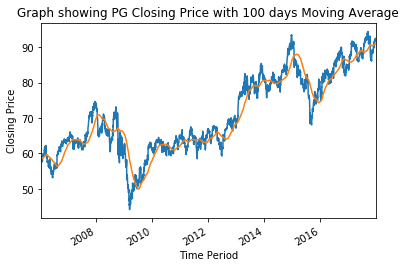

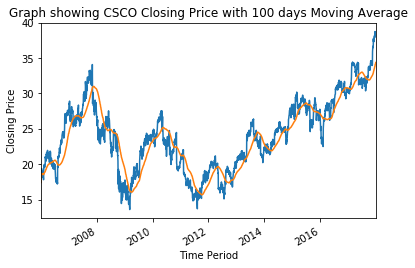

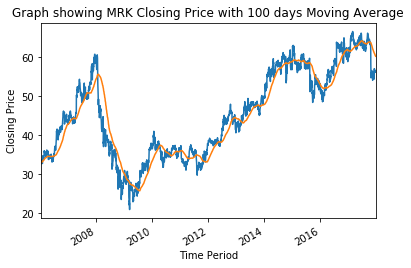

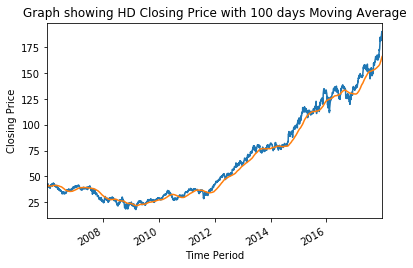

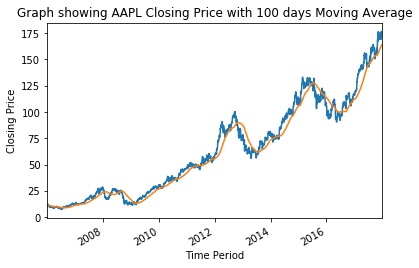

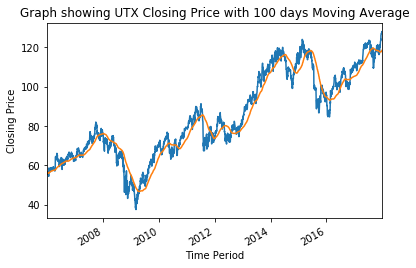

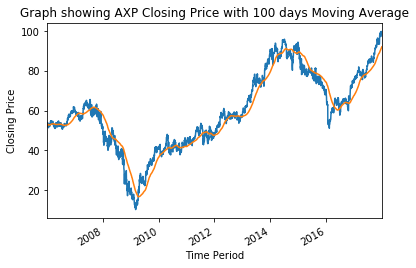

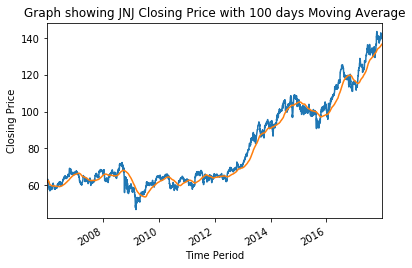

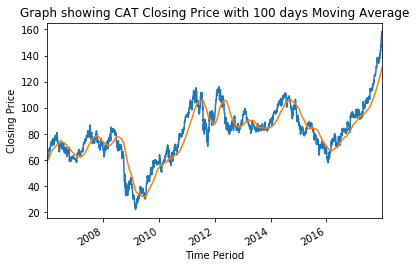

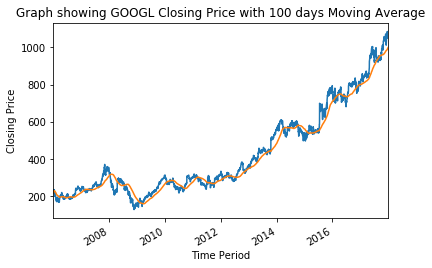

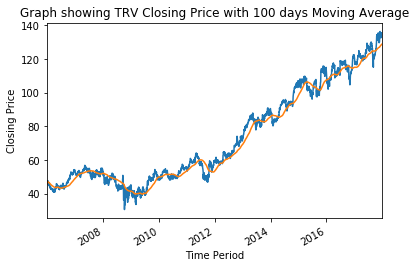

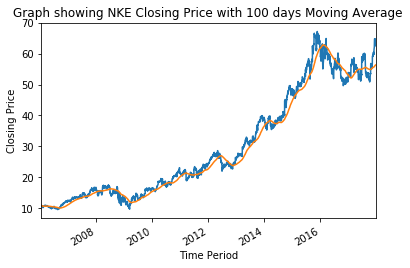

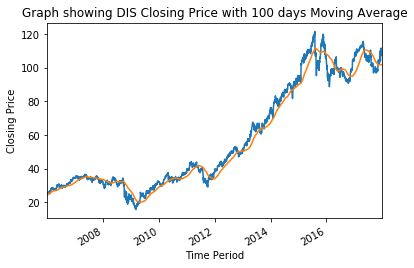

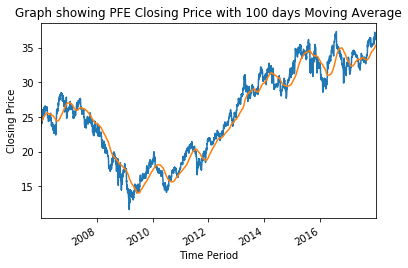

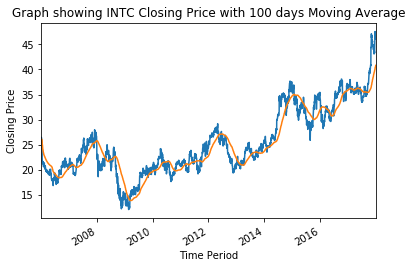

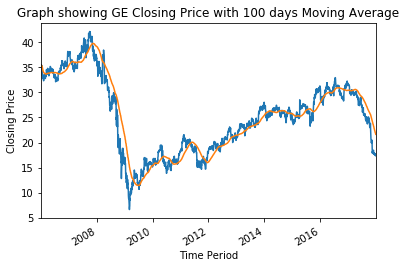

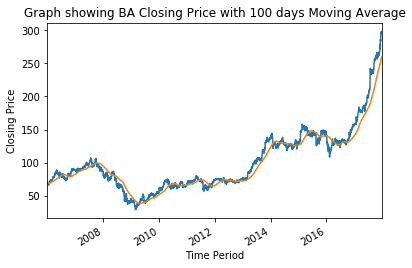

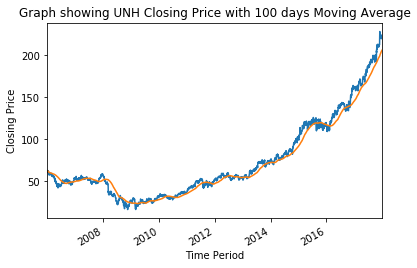

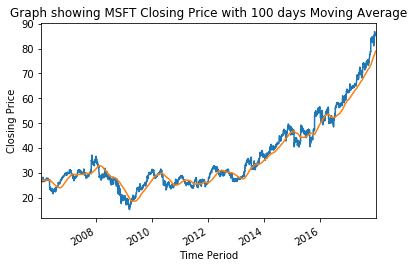

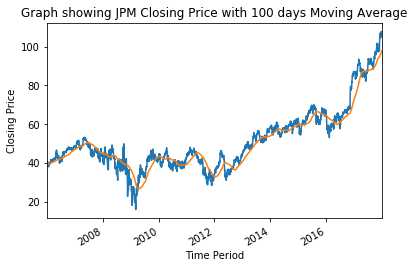

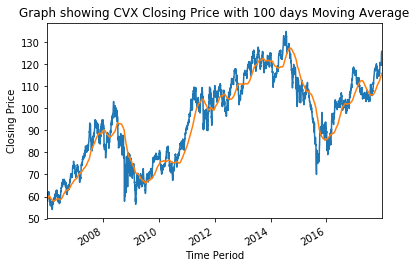

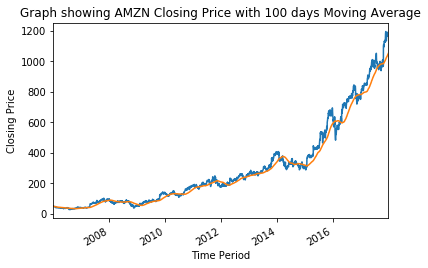

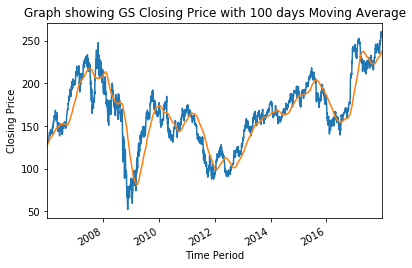

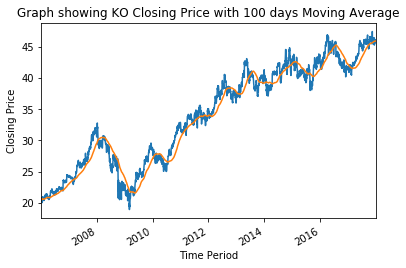

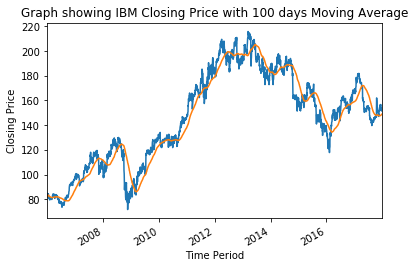

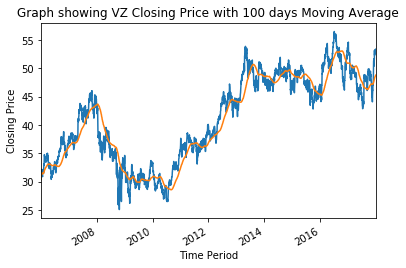

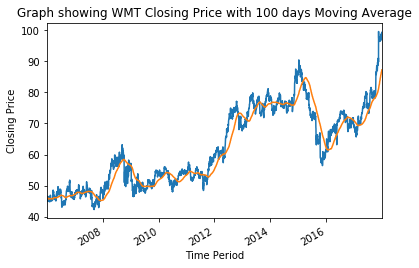

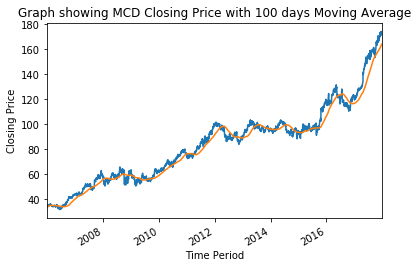

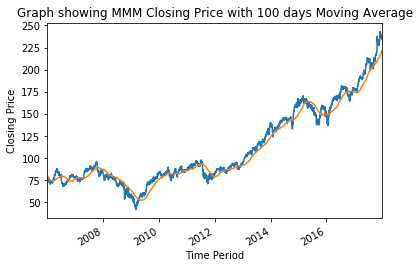

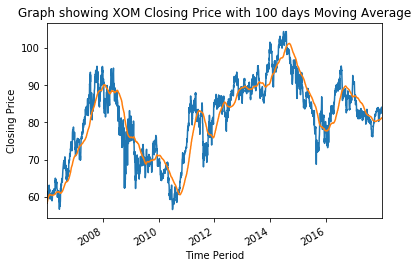

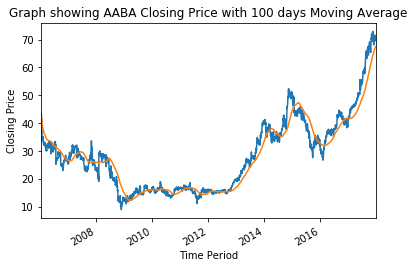

In [152]:
for i in stock_names:
    
    eda_dataset[eda_dataset['Name'] == i]['Close'].plot()
    eda_dataset[eda_dataset['Name'] == i]['Close'].rolling(window=100, min_periods=0).mean().plot()
    plt.xlabel('Time Period')
    plt.ylabel('Closing Price')
    plt.title('Graph showing ' + i + ' Closing Price with 100 days Moving Average')
    
    plt.show()

#### Visualizing Volume sold for Stocks

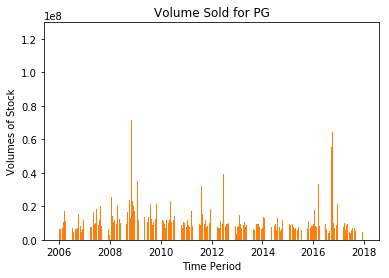

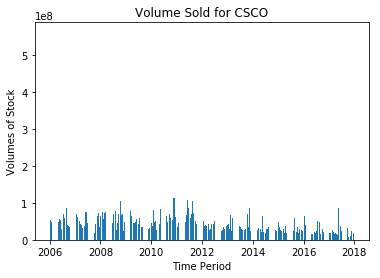

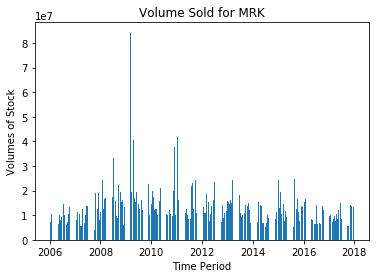

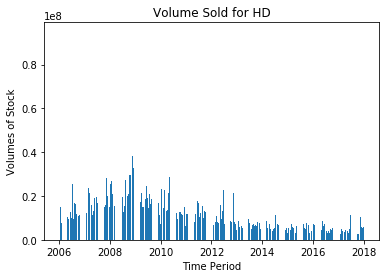

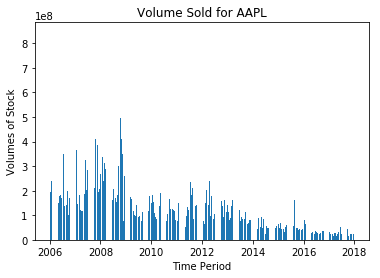

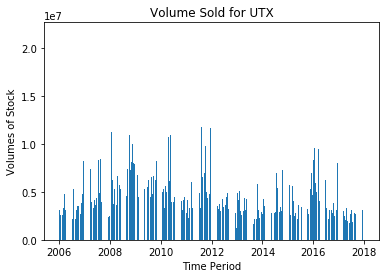

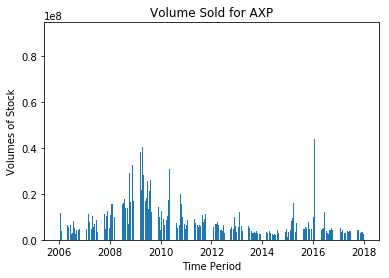

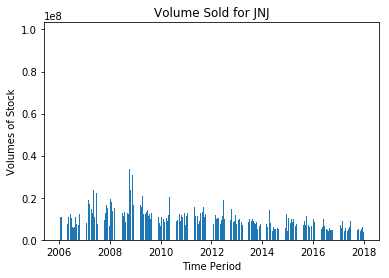

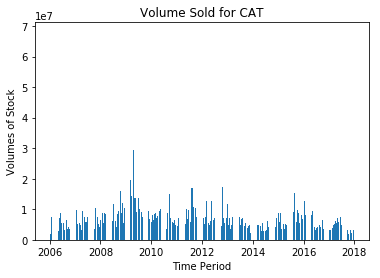

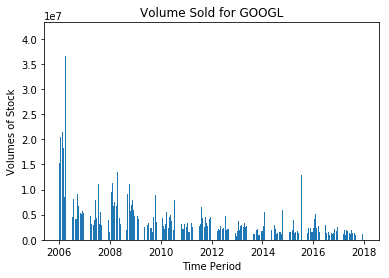

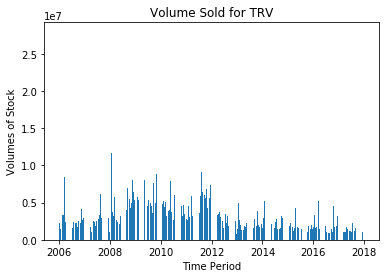

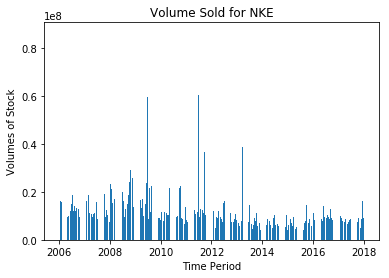

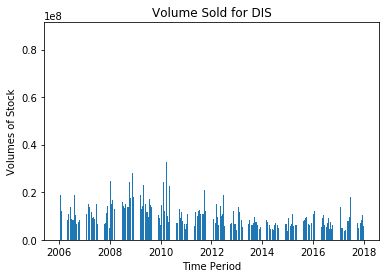

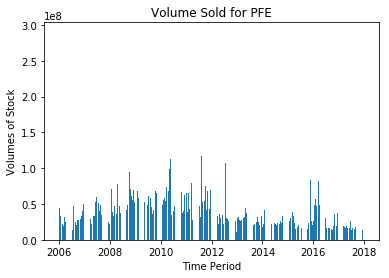

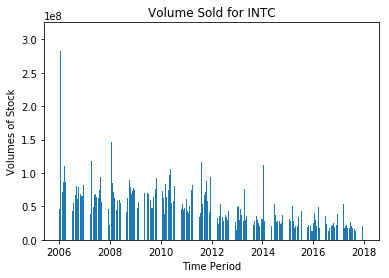

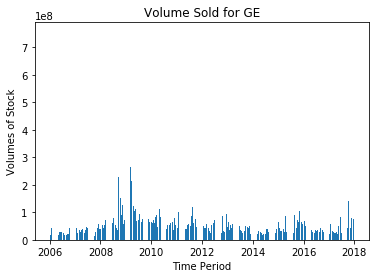

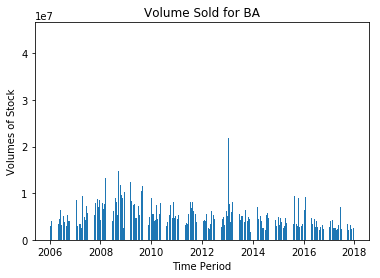

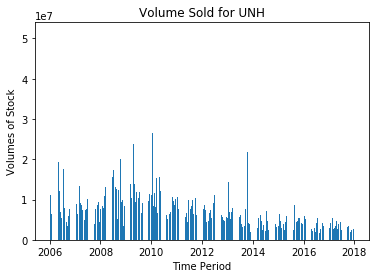

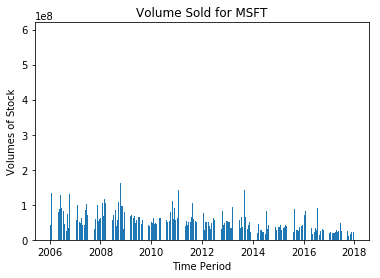

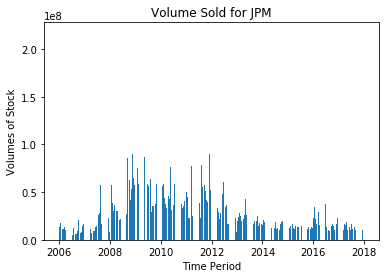

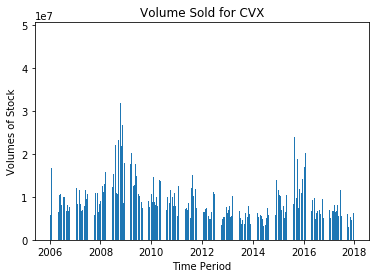

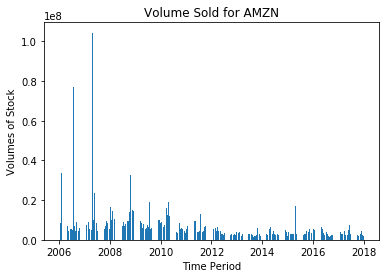

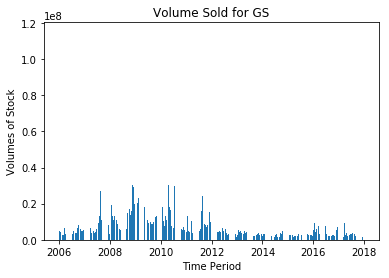

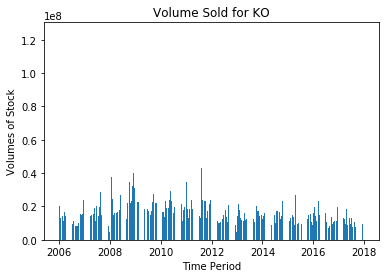

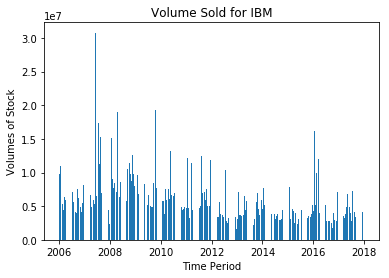

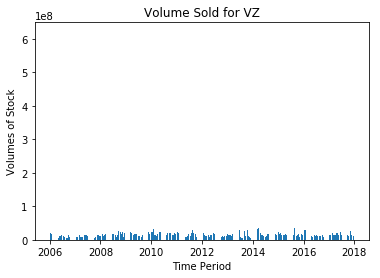

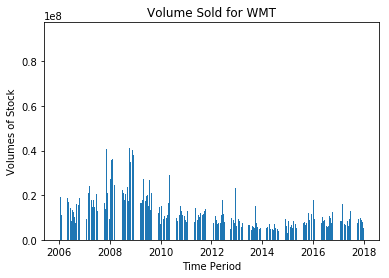

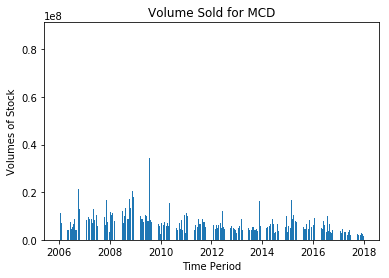

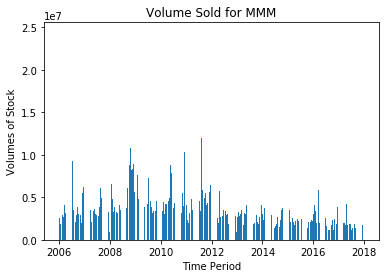

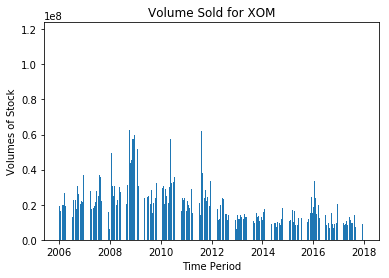

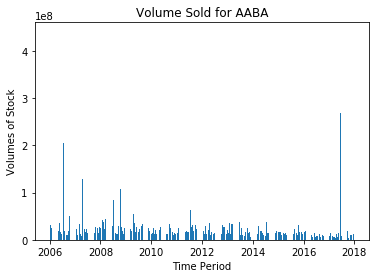

In [160]:
for i in stock_names:
    
    plt.bar(eda_dataset[eda_dataset['Name'] == i].index, eda_dataset[eda_dataset['Name'] == i]['Volume'])
    
    plt.title('Volume Sold for ' + i)
    plt.ylabel('Volumes of Stock')
    plt.xlabel('Time Period')
    plt.show()

### Focusing on 2 stock (XOM - Exxon Mobile ; GOOGL - Google)

In [177]:
googl_dataset = eda_dataset[eda_dataset['Name'] == 'GOOGL']

In [178]:
googl_dataset.describe()

Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean    428.200802   431.835618   424.130275   428.044001  3.551504e+06
std     236.320026   237.514087   234.923747   236.343238  3.038599e+06
min     131.390000   134.820000   123.770000   128.850000  5.211410e+05
25%     247.775000   250.190000   244.035000   247.605000  1.760854e+06
50%     310.480000   312.810000   307.790000   310.080000  2.517630e+06
75%     572.140000   575.975000   565.900000   570.770000  4.242182e+06
max    1083.020000  1086.490000  1072.270000  1085.090000  4.118289e+07

In [173]:
xom_dataset = eda_dataset[eda_dataset['Name'] == 'XOM']

In [175]:
xom_dataset.describe()

Open         High          Low        Close        Volume
count  3019.000000  3020.000000  3019.000000  3020.000000  3.020000e+03
mean     80.968665    81.664589    80.283239    81.012185  1.942885e+07
std      10.402705    10.369552    10.423477    10.397202  1.086254e+07
min      56.420000    56.990000    55.940000    56.570000  4.603210e+05
25%      73.180000    74.082500    72.365000    73.230000  1.169322e+07
50%      82.600000    83.220000    82.000000    82.605000  1.737146e+07
75%      88.295000    88.855000    87.650000    88.352500  2.381071e+07
max     104.420000   104.760000   103.950000   104.380000  1.180235e+08

##### Comments:

##### 1) Comparing ExxonMobile against Google, we discovered that the mean value of Google Stock Prices is 5 times higher (428.2 / 80.97)

##### 2) However, Google stocks experiences a wider variance in value

#### Creating Comparison Report

In [325]:
print('For Closing Price:')
print('--Mean--')
print('ExxonMobile Mean Closing Price is: $' + str(round(xom_dataset['Close'].mean(),2)))
print('Google Mean Closing Price is: $' + str(round(googl_dataset['Close'].mean(),2)))
print('--Maximum--')
print('ExxonMobile Maximum Closing Price is: $' + str(round(xom_dataset['Close'].max(),2)))
print('Google Maximum Closing Price is: $' + str(round(googl_dataset['Close'].max(),2)))
print('--Minimum--')
print('ExxonMobile Minimum Closing Price is: $' + str(round(xom_dataset['Close'].min(),2)))
print('Google Minimum Closing Price is: $' + str(round(googl_dataset['Close'].min(),2)))
print('--Standard Deviation--')
print('ExxonMobile Standard Deviation for Closing Price is: ' + str(round(xom_dataset['Close'].std(),2)))
print('Google Standard Deviation for Closing Price is: ' + str(round(googl_dataset['Close'].std(),2)))
print()
if xom_dataset['Close'].mean() > googl_dataset['Close'].mean():
    print('ExxonMobile has a higher Mean Closing Price! The difference is $' + str(round(xom_dataset['Close'].mean() - googl_dataset['Close'].mean(),2)))
else:
    print('Google has a higher Mean Closing Price! The difference is $' + str(round(googl_dataset['Close'].mean() - xom_dataset['Close'].mean(),2)))

if xom_dataset['Close'].max() > googl_dataset['Close'].max():
    print('ExxonMobile has a higher Maximum Closing Price! The difference is $' + str(round(xom_dataset['Close'].max() - googl_dataset['Close'].max(),2)))
else:
    print('Google has a higher Maximum Closing Price! The difference is $' + str(round(googl_dataset['Close'].max() - xom_dataset['Close'].max(),2)))

if xom_dataset['Close'].min() > googl_dataset['Close'].min():
    print('ExxonMobile has a higher Mean Closing Price! The difference is $' + str(round(xom_dataset['Close'].min() - googl_dataset['Close'].min(),2)))
else:
    print('Google has a higher Mean Closing Price! The difference is $' + str(round(googl_dataset['Close'].min() - xom_dataset['Close'].min(),2)))

if xom_dataset['Close'].std() > googl_dataset['Close'].std():
    print('ExxonMobile has a higher standard deviation!')
else:
    print('Google has a higher standard deviation!')

#################################
print()
print('For Opening Price:')
print('--Mean--')
print('ExxonMobile Mean Opening Price is: $' + str(round(xom_dataset['Open'].mean(),2)))
print('Google Mean Opening Price is: $' + str(round(googl_dataset['Open'].mean(),2)))
print('--Maximum--')
print('ExxonMobile Maximum Opening Price is: $' + str(round(xom_dataset['Open'].max(),2)))
print('Google Maximum Opening Price is: $' + str(round(googl_dataset['Open'].max(),2)))
print('--Minimum--')
print('ExxonMobile Minimum Opening Price is: $' + str(round(xom_dataset['Open'].min(),2)))
print('Google Minimum Opening Price is: $' + str(round(googl_dataset['Open'].min(),2)))
print('--Standard Deviation--')
print('ExxonMobile Standard Deviation for Opening Price is: ' + str(round(xom_dataset['Open'].std(),2)))
print('Google Standard Deviation for Opening Price is: ' + str(round(googl_dataset['Open'].std(),2)))
print()
if xom_dataset['Open'].mean() > googl_dataset['Open'].mean():
    print('ExxonMobile has a higher Mean Opening Price! The difference is $' + str(round(xom_dataset['Open'].mean() - googl_dataset['Open'].mean(),2)))
else:
    print('Google has a higher Mean Opening Price! The difference is $' + str(round(googl_dataset['Open'].mean() - xom_dataset['Open'].mean(),2)))

if xom_dataset['Open'].max() > googl_dataset['Open'].max():
    print('ExxonMobile has a higher Maximum Opening Price! The difference is $' + str(round(xom_dataset['Open'].max() - googl_dataset['Open'].max(),2)))
else:
    print('Google has a higher Maximum Opening Price! The difference is $' + str(round(googl_dataset['Open'].max() - xom_dataset['Open'].max(),2)))

if xom_dataset['Open'].min() > googl_dataset['Open'].min():
    print('ExxonMobile has a higher Minimum Opening Price! The difference is $' + str(round(xom_dataset['Open'].min() - googl_dataset['Open'].min(),2)))
else:
    print('Google has a higher Minimum Opening Price! The difference is $' + str(round(googl_dataset['Open'].min() - xom_dataset['Open'].min(),2)))

if xom_dataset['Open'].std() > googl_dataset['Open'].std():
    print('ExxonMobile has a higher standard deviation!')
else:
    print('Google has a higher standard deviation!')
    
#################################    
print()
print('For Low Price:')
print('--Mean--')
print('ExxonMobile Mean Low Price is: $' + str(round(xom_dataset['Low'].mean(),2)))
print('Google Mean Low Price is: $' + str(round(googl_dataset['Low'].mean(),2)))
print('--Maximum--')
print('ExxonMobile Maximum Low Price is: $' + str(round(xom_dataset['Low'].max(),2)))
print('Google Maximum Low Price is: $' + str(round(googl_dataset['Low'].max(),2)))
print('--Minimum--')
print('ExxonMobile Minimum Low Price is: $' + str(round(xom_dataset['Low'].min(),2)))
print('Google Minimum Low Price is: $' + str(round(googl_dataset['Low'].min(),2)))
print('--Standard Deviation--')
print('ExxonMobile Standard Deviation for Low Price is: ' + str(round(xom_dataset['Low'].std(),2)))
print('Google Standard Deviation for Low Price is: ' + str(round(googl_dataset['Low'].std(),2)))
print()
if xom_dataset['Low'].mean() > googl_dataset['Low'].mean():
    print('ExxonMobile has a higher Mean Low Price! The difference is $' + str(round(xom_dataset['Low'].mean() - googl_dataset['Low'].mean(),2)))
else:
    print('Google has a higher Mean Low Price! The difference is $' + str(round(googl_dataset['Low'].mean() - xom_dataset['Low'].mean(),2)))

if xom_dataset['Low'].max() > googl_dataset['Low'].max():
    print('ExxonMobile has a higher Maximum Low Price! The difference is $' + str(round(xom_dataset['Low'].max() - googl_dataset['Low'].max(),2)))
else:
    print('Google has a higher Maximum Low Price! The difference is $' + str(round(googl_dataset['Low'].max() - xom_dataset['Low'].max(),2)))

if xom_dataset['Low'].min() > googl_dataset['Low'].min():
    print('ExxonMobile has a higher Minimum Low Price! The difference is $' + str(round(xom_dataset['Low'].min() - googl_dataset['Low'].min(),2)))
else:
    print('Google has a higher Minimum Low Price! The difference is $' + str(round(googl_dataset['Low'].min() - xom_dataset['Low'].min(),2)))

if xom_dataset['Low'].std() > googl_dataset['Low'].std():
    print('ExxonMobile has a higher standard deviation!')
else:
    print('Google has a higher standard deviation!')
    
#################################    
print()
print('For High Price:')
print('--Mean--')
print('ExxonMobile Mean High Price is: $' + str(round(xom_dataset['High'].mean(),2)))
print('Google Mean High Price is: $' + str(round(googl_dataset['High'].mean(),2)))
print('--Maximum--')
print('ExxonMobile Maximum High Price is: $' + str(round(xom_dataset['High'].max(),2)))
print('Google Maximum High Price is: $' + str(round(googl_dataset['High'].max(),2)))
print('--Minimum--')
print('ExxonMobile Minimum High Price is: $' + str(round(xom_dataset['High'].min(),2)))
print('Google Minimum High Price is: $' + str(round(googl_dataset['High'].min(),2)))
print('--Standard Deviation--')
print('ExxonMobile Standard Deviation for High Price is: ' + str(round(xom_dataset['High'].std(),2)))
print('Google Standard Deviation for High Price is: ' + str(round(googl_dataset['High'].std(),2)))
print()
if xom_dataset['High'].mean() > googl_dataset['High'].mean():
    print('ExxonMobile has a higher Mean High Price! The difference is $' + str(round(xom_dataset['High'].mean() - googl_dataset['High'].mean(),2)))
else:
    print('Google has a higher Mean High Price! The difference is $' + str(round(googl_dataset['High'].mean() - xom_dataset['High'].mean(),2)))

if xom_dataset['High'].max() > googl_dataset['High'].max():
    print('ExxonMobile has a higher Maximum High Price! The difference is $' + str(round(xom_dataset['High'].max() - googl_dataset['High'].max(),2)))
else:
    print('Google has a higher Maximum High Price! The difference is $' + str(round(googl_dataset['High'].max() - xom_dataset['High'].max(),2)))

if xom_dataset['High'].min() > googl_dataset['High'].min():
    print('ExxonMobile has a higher Minimum High Price! The difference is $' + str(round(xom_dataset['High'].min() - googl_dataset['High'].min(),2)))
else:
    print('Google has a higher Minimum High Price! The difference is $' + str(round(googl_dataset['High'].min() - xom_dataset['High'].min(),2)))

if xom_dataset['High'].std() > googl_dataset['High'].std():
    print('ExxonMobile has a higher standard deviation!')
else:
    print('Google has a higher standard deviation!')

For Closing Price:
--Mean--
ExxonMobile Mean Closing Price is: $81.01
Google Mean Closing Price is: $428.04
--Maximum--
ExxonMobile Maximum Closing Price is: $104.38
Google Maximum Closing Price is: $1085.09
--Minimum--
ExxonMobile Minimum Closing Price is: $56.57
Google Minimum Closing Price is: $128.85
--Standard Deviation--
ExxonMobile Standard Deviation for Closing Price is: 10.4
Google Standard Deviation for Closing Price is: 236.34

Google has a higher Mean Closing Price! The difference is $347.03
Google has a higher Maximum Closing Price! The difference is $980.71
Google has a higher Mean Closing Price! The difference is $72.28
Google has a higher standard deviation!

For Opening Price:
--Mean--
ExxonMobile Mean Opening Price is: $80.97
Google Mean Opening Price is: $428.2
--Maximum--
ExxonMobile Maximum Opening Price is: $104.42
Google Maximum Opening Price is: $1083.02
--Minimum--
ExxonMobile Minimum Opening Price is: $56.42
Google Minimum Opening Price is: $131.39
--Standard 

#### Data Visualization per Time Period

In [372]:
xom_dataset_period = xom_dataset.reset_index()

xom_dataset_period['Year'] = xom_dataset_period['Date'].apply(lambda x: x.year)

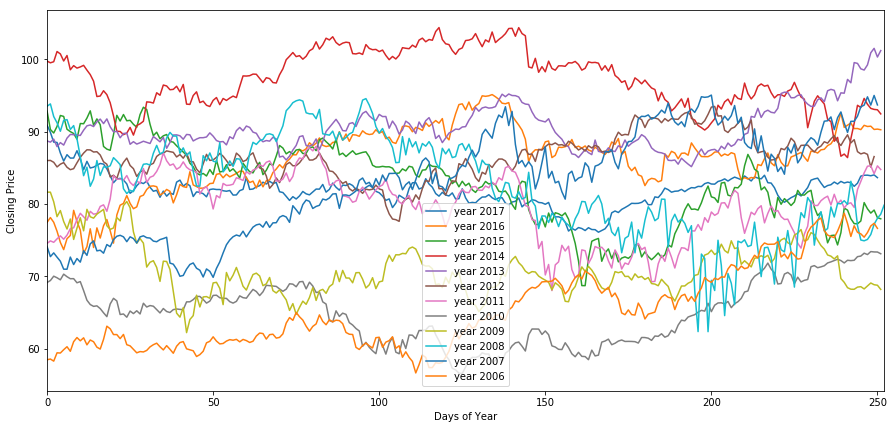

In [375]:
plt.figure(figsize=(15,7))

xom_dataset_period[xom_dataset_period['Year'] == 2017].reset_index()['Close'].plot(label='year 2017')
xom_dataset_period[xom_dataset_period['Year'] == 2016].reset_index()['Close'].plot(label='year 2016')
xom_dataset_period[xom_dataset_period['Year'] == 2015].reset_index()['Close'].plot(label='year 2015')
xom_dataset_period[xom_dataset_period['Year'] == 2014].reset_index()['Close'].plot(label='year 2014')
xom_dataset_period[xom_dataset_period['Year'] == 2013].reset_index()['Close'].plot(label='year 2013')
xom_dataset_period[xom_dataset_period['Year'] == 2012].reset_index()['Close'].plot(label='year 2012')
xom_dataset_period[xom_dataset_period['Year'] == 2011].reset_index()['Close'].plot(label='year 2011')
xom_dataset_period[xom_dataset_period['Year'] == 2010].reset_index()['Close'].plot(label='year 2010')
xom_dataset_period[xom_dataset_period['Year'] == 2009].reset_index()['Close'].plot(label='year 2009')
xom_dataset_period[xom_dataset_period['Year'] == 2008].reset_index()['Close'].plot(label='year 2008')
xom_dataset_period[xom_dataset_period['Year'] == 2007].reset_index()['Close'].plot(label='year 2007')
xom_dataset_period[xom_dataset_period['Year'] == 2006].reset_index()['Close'].plot(label='year 2006')

plt.ylabel('Closing Price')
plt.xlabel('Days of Year')
plt.legend()
plt.show()

In [376]:
googl_dataset_period = googl_dataset.reset_index()

googl_dataset_period['Year'] = googl_dataset_period['Date'].apply(lambda x: x.year)

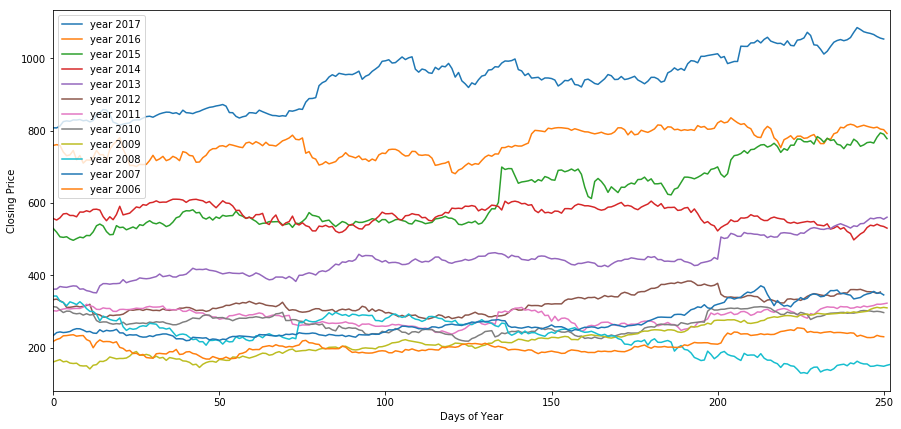

In [377]:
plt.figure(figsize=(15,7))

googl_dataset_period[googl_dataset_period['Year'] == 2017].reset_index()['Close'].plot(label='year 2017')
googl_dataset_period[googl_dataset_period['Year'] == 2016].reset_index()['Close'].plot(label='year 2016')
googl_dataset_period[googl_dataset_period['Year'] == 2015].reset_index()['Close'].plot(label='year 2015')
googl_dataset_period[googl_dataset_period['Year'] == 2014].reset_index()['Close'].plot(label='year 2014')
googl_dataset_period[googl_dataset_period['Year'] == 2013].reset_index()['Close'].plot(label='year 2013')
googl_dataset_period[googl_dataset_period['Year'] == 2012].reset_index()['Close'].plot(label='year 2012')
googl_dataset_period[googl_dataset_period['Year'] == 2011].reset_index()['Close'].plot(label='year 2011')
googl_dataset_period[googl_dataset_period['Year'] == 2010].reset_index()['Close'].plot(label='year 2010')
googl_dataset_period[googl_dataset_period['Year'] == 2009].reset_index()['Close'].plot(label='year 2009')
googl_dataset_period[googl_dataset_period['Year'] == 2008].reset_index()['Close'].plot(label='year 2008')
googl_dataset_period[googl_dataset_period['Year'] == 2007].reset_index()['Close'].plot(label='year 2007')
googl_dataset_period[googl_dataset_period['Year'] == 2006].reset_index()['Close'].plot(label='year 2006')

plt.ylabel('Closing Price')
plt.xlabel('Days of Year')
plt.legend()
plt.show()

#### Plotting Moving Averages over Time

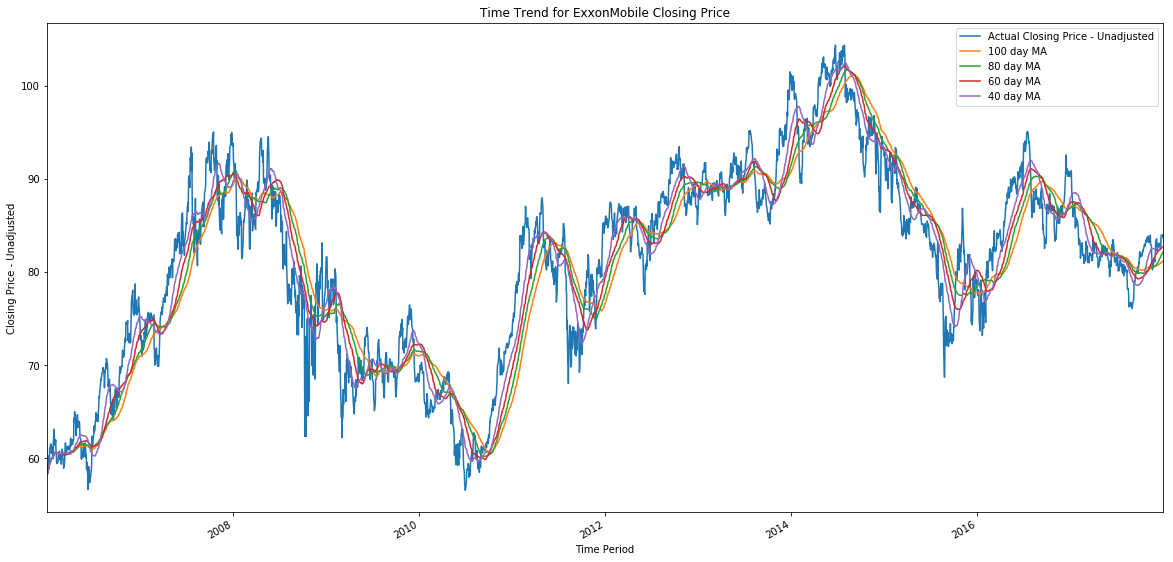

In [187]:
plt.figure(figsize = (20,10))

xom_dataset['Close'].plot(label = 'Actual Closing Price - Unadjusted')
xom_dataset['Close'].rolling(window=100, min_periods=0).mean().plot(label = '100 day MA')
xom_dataset['Close'].rolling(window=80, min_periods=0).mean().plot(label = '80 day MA')
xom_dataset['Close'].rolling(window=60, min_periods=0).mean().plot(label = '60 day MA')
xom_dataset['Close'].rolling(window=40, min_periods=0).mean().plot(label = '40 day MA')

plt.xlabel('Time Period')
plt.ylabel('Closing Price - Unadjusted')
plt.title('Time Trend for ExxonMobile Closing Price')
plt.legend()
plt.show()

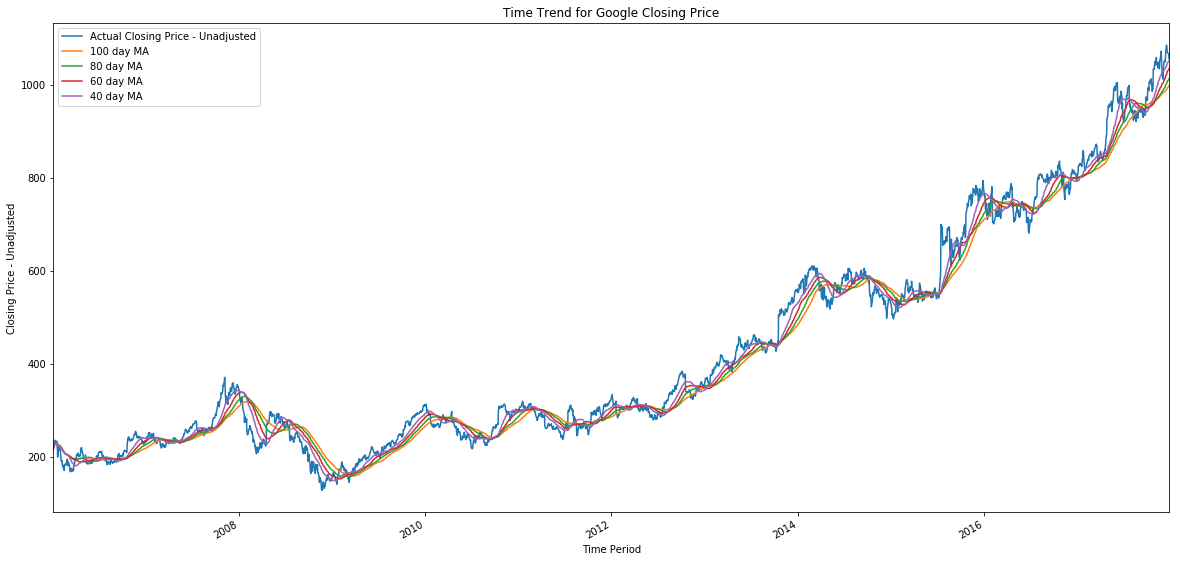

In [188]:
plt.figure(figsize = (20,10))

googl_dataset['Close'].plot(label = 'Actual Closing Price - Unadjusted')
googl_dataset['Close'].rolling(window=100, min_periods=0).mean().plot(label = '100 day MA')
googl_dataset['Close'].rolling(window=80, min_periods=0).mean().plot(label = '80 day MA')
googl_dataset['Close'].rolling(window=60, min_periods=0).mean().plot(label = '60 day MA')
googl_dataset['Close'].rolling(window=40, min_periods=0).mean().plot(label = '40 day MA')

plt.xlabel('Time Period')
plt.ylabel('Closing Price - Unadjusted')
plt.title('Time Trend for Google Closing Price')
plt.legend()
plt.show()

#### Creating CandleSticks - ExxonMobile

In [213]:
from matplotlib.finance import candlestick_ohlc
import matplotlib.dates as mdates

In [214]:
xom_candle_dataset = xom_dataset['Close'].resample('10D').ohlc()
xom_candle_dataset.reset_index(inplace=True)

In [216]:
xom_candle_dataset['Date'] =  xom_candle_dataset['Date'].map(mdates.date2num)

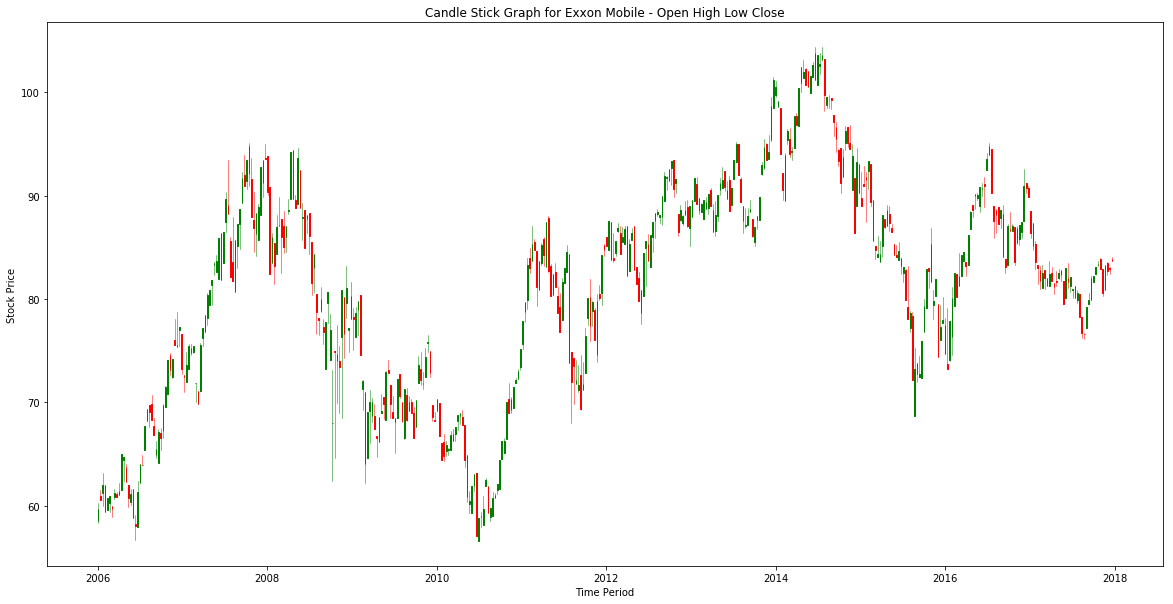

In [297]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(111)
ax1.xaxis_date()

candlestick_ohlc(ax1, xom_candle_dataset.values, width=3, colorup='g')

plt.title('Candle Stick Graph for Exxon Mobile - Open High Low Close')
plt.ylabel('Stock Price')
plt.xlabel('Time Period')
plt.show()

#### Creating CandleSticks - Google

In [298]:
googl_candle_dataset = googl_dataset['Close'].resample('10D').ohlc()
googl_candle_dataset.reset_index(inplace=True)

In [299]:
googl_candle_dataset['Date'] =  googl_candle_dataset['Date'].map(mdates.date2num)

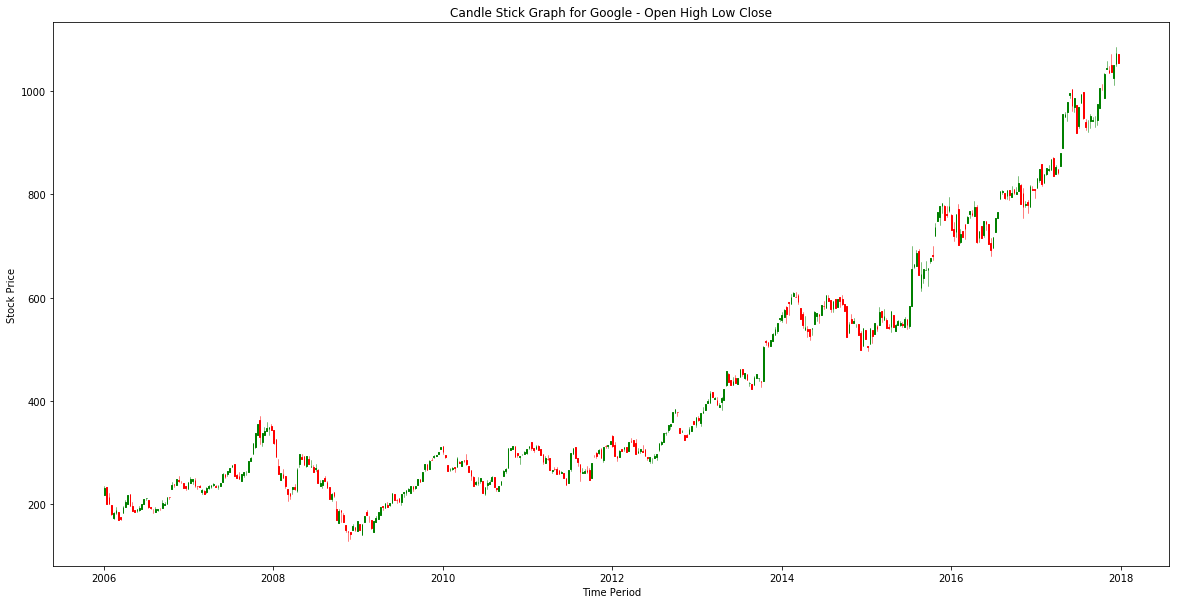

In [303]:
fig = plt.figure(figsize=(20,10))

ax1 = fig.add_subplot(111)
ax1.xaxis_date()

candlestick_ohlc(ax1, googl_candle_dataset.values, width=3, colorup='g')

plt.title('Candle Stick Graph for Google - Open High Low Close')
plt.ylabel('Stock Price')
plt.xlabel('Time Period')
plt.show()

### Focusing on 5 stocks (AAPL = APPLE; GOOGL = GOOGLE; IBM = IBM; AMZN = AMAZON; MSFT = MICROSOFT)

In [327]:
focus_5 = ['AAPL', 'GOOGL', 'IBM', 'AMZN', 'MSFT']

#### Creating Descriptive Analysis

In [330]:
for i in focus_5:
    
    print(i)
    print(eda_dataset[eda_dataset['Name'] == i].describe())
    print()

AAPL
              Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean     64.673309    65.256833    64.033445    64.662892  1.311457e+08
std      44.524927    44.811772    44.230829    44.536448  1.018560e+08
min       7.390000     7.560000     7.170000     7.240000  1.147592e+07
25%      23.425000    23.805000    23.015000    23.420000  5.292889e+07
50%      57.860000    58.460000    57.320000    57.920000  1.066271e+08
75%      99.165000   100.275000    98.385000    99.480000  1.798977e+08
max     175.110000   177.200000   174.860000   176.420000  8.432640e+08

GOOGL
              Open         High          Low        Close        Volume
count  3019.000000  3019.000000  3019.000000  3019.000000  3.019000e+03
mean    428.200802   431.835618   424.130275   428.044001  3.551504e+06
std     236.320026   237.514087   234.923747   236.343238  3.038599e+06
min     131.390000   134.820000   123.770000   128.8

#### Creating Comparison Report:

In [348]:
open_min = 0
open_min_name = []
open_max = 0
open_max_name = []
open_std = 0
open_std_name = []

close_min = 0
close_min_name = []
close_max = 0
close_max_name = []
close_std = 0
close_std_name = []

high_min = 0
high_min_name = []
high_max = 0
high_max_name = []
high_std = 0
high_std_name = []

low_min = 0
low_min_name = []
low_max = 0
low_max_name = []
low_std = 0
low_std_name = []

volume_min = 0
volume_min_name = []
volume_max = 0
volume_max_name = []

for i in focus_5:
    
    if open_min == 0:
        
        open_min = eda_dataset[eda_dataset['Name'] == i]['Open'].min()
        open_min_name = i
        
    else:
        
        if open_min <= eda_dataset[eda_dataset['Name'] == i]['Open'].min():
            
            open_min = open_min
        
        else:
            
            open_min = eda_dataset[eda_dataset['Name'] == i]['Open'].min()
            open_min_name = i
            
    if open_max == 0:
        
        open_max = eda_dataset[eda_dataset['Name'] == i]['Open'].max()
        open_max_name = i
        
    else:
        
        if open_max > eda_dataset[eda_dataset['Name'] == i]['Open'].max():
            
            open_max = open_max
        
        else:
            
            open_max = eda_dataset[eda_dataset['Name'] == i]['Open'].max()
            open_max_name = i
            
    if open_std == 0:
        
        open_std = round(eda_dataset[eda_dataset['Name'] == i]['Open'].std(),2)
        open_std_name = i
        
    else:
        
        if open_std > round(eda_dataset[eda_dataset['Name'] == i]['Open'].std(),2):
            
            open_std = open_std
        
        else:
            
            open_std = round(eda_dataset[eda_dataset['Name'] == i]['Open'].std(),2)
            open_std_name = i
            
#################################################################################################################       
            
    if close_min == 0:
        
        close_min = eda_dataset[eda_dataset['Name'] == i]['Close'].min()
        close_min_name = i
        
    else:
        
        if close_min <= eda_dataset[eda_dataset['Name'] == i]['Close'].min():
            
            close_min = close_min
        
        else:
            
            close_min = eda_dataset[eda_dataset['Name'] == i]['Close'].min()
            close_min_name = i
            
    if close_max == 0:
        
        close_max = eda_dataset[eda_dataset['Name'] == i]['Close'].max()
        close_max_name = i
        
    else:
        
        if close_max > eda_dataset[eda_dataset['Name'] == i]['Close'].max():
            
            close_max = close_max
        
        else:
            
            close_max = eda_dataset[eda_dataset['Name'] == i]['Close'].max()
            close_max_name = i
                      
    if close_std == 0:
        
        close_std = round(eda_dataset[eda_dataset['Name'] == i]['Close'].std(),2)
        close_std_name = i
        
    else:
        
        if close_std > round(eda_dataset[eda_dataset['Name'] == i]['Close'].std(),2):
            
            close_std = close_std
        
        else:
            
            close_std = round(eda_dataset[eda_dataset['Name'] == i]['Close'].std(),2)
            close_std_name = i
            
#################################################################################################################       
            
    if high_min == 0:
        
        high_min = eda_dataset[eda_dataset['Name'] == i]['High'].min()
        high_min_name = i
        
    else:
        
        if high_min <= eda_dataset[eda_dataset['Name'] == i]['High'].min():
            
            high_min = high_min
        
        else:
            
            high_min = eda_dataset[eda_dataset['Name'] == i]['High'].min()
            high_min_name = i
            
    if high_max == 0:
        
        high_max = eda_dataset[eda_dataset['Name'] == i]['High'].max()
        high_max_name = i
        
    else:
        
        if high_max > eda_dataset[eda_dataset['Name'] == i]['High'].max():
            
            high_max = high_max
        
        else:
            
            high_max = eda_dataset[eda_dataset['Name'] == i]['High'].max()
            high_max_name = i
                      
    if high_std == 0:
        
        high_std = round(eda_dataset[eda_dataset['Name'] == i]['High'].std(),2)
        high_std_name = i
        
    else:
        
        if high_std > round(eda_dataset[eda_dataset['Name'] == i]['High'].std(),2):
            
            high_std = high_std
        
        else:
            
            high_std = round(eda_dataset[eda_dataset['Name'] == i]['High'].std(),2)
            high_std_name = i

#################################################################################################################       
            
    if low_min == 0:
        
        low_min = eda_dataset[eda_dataset['Name'] == i]['Low'].min()
        low_min_name = i
        
    else:
        
        if low_min <= eda_dataset[eda_dataset['Name'] == i]['Low'].min():
            
            low_min = low_min
        
        else:
            
            low_min = eda_dataset[eda_dataset['Name'] == i]['Low'].min()
            low_min_name = i
            
    if low_max == 0:
        
        low_max = eda_dataset[eda_dataset['Name'] == i]['Low'].max()
        low_max_name = i
        
    else:
        
        if low_max > eda_dataset[eda_dataset['Name'] == i]['Low'].max():
            
            low_max = low_max
        
        else:
            
            low_max = eda_dataset[eda_dataset['Name'] == i]['Low'].max()
            low_max_name = i
                      
    if low_std == 0:
        
        low_std = round(eda_dataset[eda_dataset['Name'] == i]['Low'].std(),2)
        low_std_name = i
        
    else:
        
        if low_std > round(eda_dataset[eda_dataset['Name'] == i]['Low'].std(),2):
            
            low_std = low_std
        
        else:
            
            low_std = round(eda_dataset[eda_dataset['Name'] == i]['Low'].std(),2)
            low_std_name = i

#################################################################################################################       
            
    if volume_min == 0:
        
        volume_min = eda_dataset[eda_dataset['Name'] == i]['Volume'].min()
        volume_min_name = i
        
    else:
        
        if volume_min <= eda_dataset[eda_dataset['Name'] == i]['Volume'].min():
            
            volume_min = volume_min
        
        else:
            
            volume_min = eda_dataset[eda_dataset['Name'] == i]['Volume'].min()
            volume_min_name = i
            
    if volume_max == 0:
        
        volume_max = eda_dataset[eda_dataset['Name'] == i]['Volume'].max()
        volume_max_name = i
        
    else:
        
        if volume_max > eda_dataset[eda_dataset['Name'] == i]['Volume'].max():
            
            volume_max = volume_max
        
        else:
            
            volume_max = eda_dataset[eda_dataset['Name'] == i]['Volume'].max()
            volume_max_name = i

In [349]:
print('Maximum Values')
print('The stock with the highest opening price is ${a} from {b}'.format(a=open_max, b=open_max_name))
print('The stock with the highest closing price is ${a} from {b}'.format(a=close_max, b=close_max_name))
print('The stock with the highest low price is ${a} from {b}'.format(a=low_max, b=low_max_name))
print('The stock with the highest high price is ${a} from {b}'.format(a=high_max, b=high_max_name))
print()
print('Minimum Values')
print('The stock with the lowest opening price is ${a} from {b}'.format(a=open_min, b=open_min_name))
print('The stock with the lowest closing price is ${a} from {b}'.format(a=close_min, b=close_min_name))
print('The stock with the lowest low price is ${a} from {b}'.format(a=low_min, b=low_min_name))
print('The stock with the lowest high price is ${a} from {b}'.format(a=high_min, b=high_min_name))
print()
print('Standard Deviation')
print('The stock with the highest opening price standard deviation is {a} from {b}'.format(a=open_std, b=open_std_name))
print('The stock with the highest closing price standard deviation is {a} from {b}'.format(a=close_std, b=close_std_name))
print('The stock with the highest low price standard deviation is {a} from {b}'.format(a=low_std, b=low_std_name))
print('The stock with the highest high price standard deviation is {a} from {b}'.format(a=high_std, b=high_std_name))

Maximum Values
The stock with the highest opening price is $1204.88 from AMZN
The stock with the highest closing price is $1195.83 from AMZN
The stock with the highest low price is $1191.15 from AMZN
The stock with the highest high price is $1213.41 from AMZN

Minimum Values
The stock with the lowest opening price is $7.39 from AAPL
The stock with the lowest closing price is $7.24 from AAPL
The stock with the lowest low price is $7.17 from AAPL
The stock with the lowest high price is $7.56 from AAPL

Standard Deviation
The stock with the highest opening price standard deviation is 280.12 from AMZN
The stock with the highest closing price standard deviation is 279.98 from AMZN
The stock with the highest low price standard deviation is 277.93 from AMZN
The stock with the highest high price standard deviation is 281.83 from AMZN


#### Providing Data Visualization

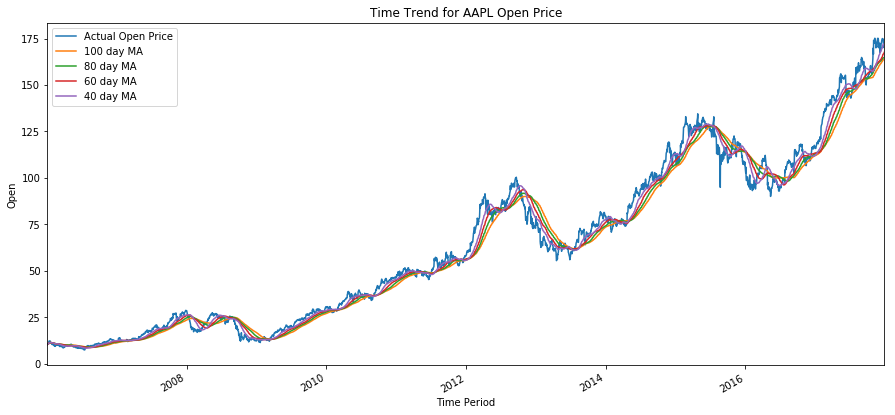

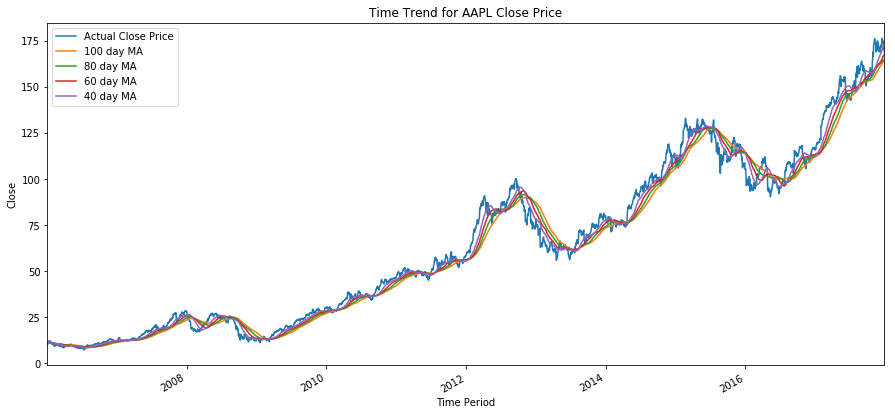

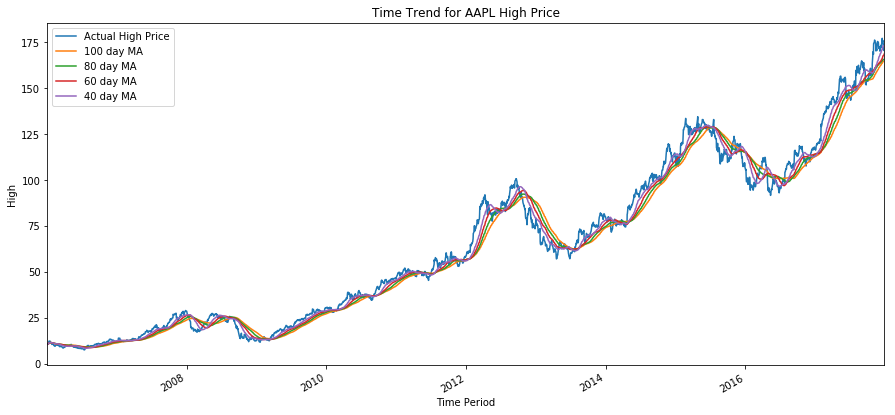

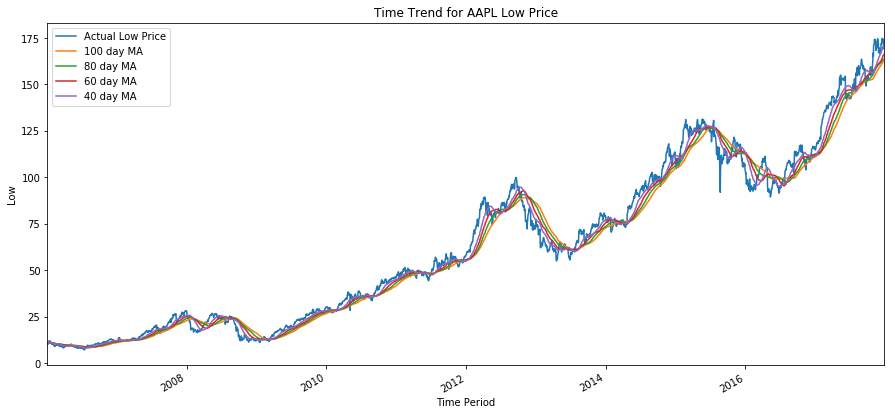

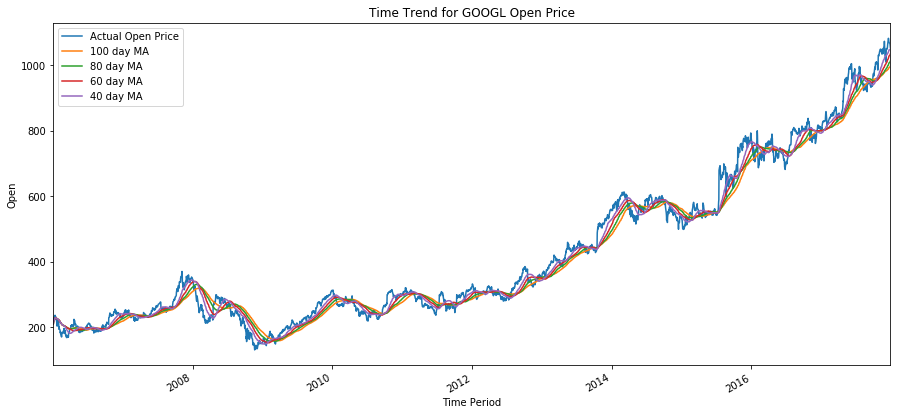

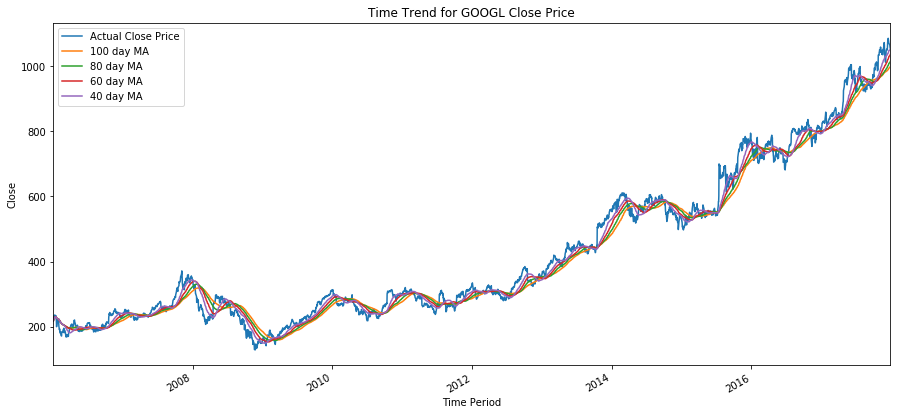

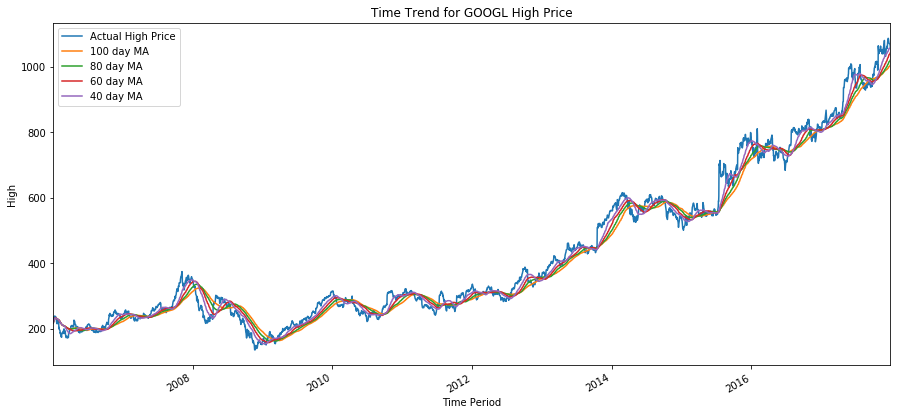

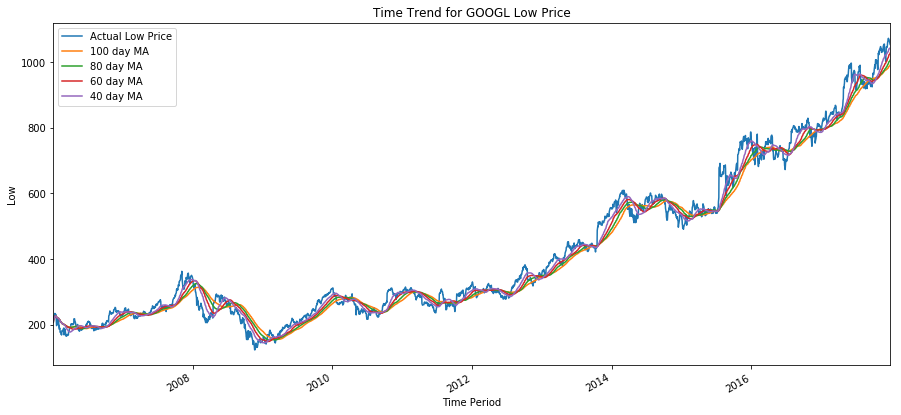

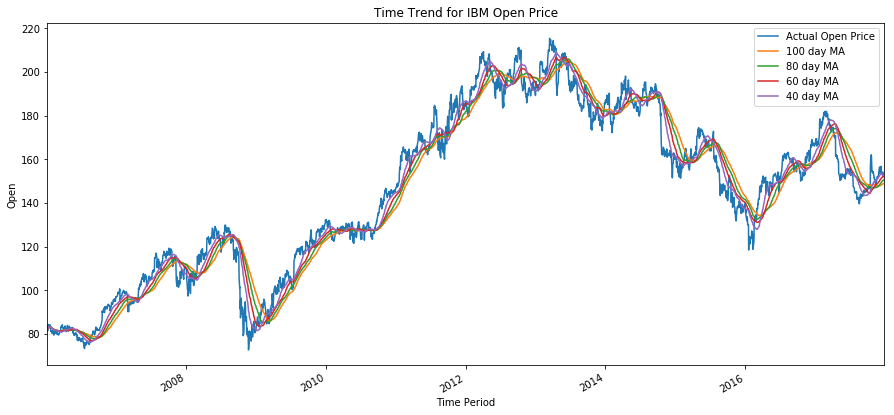

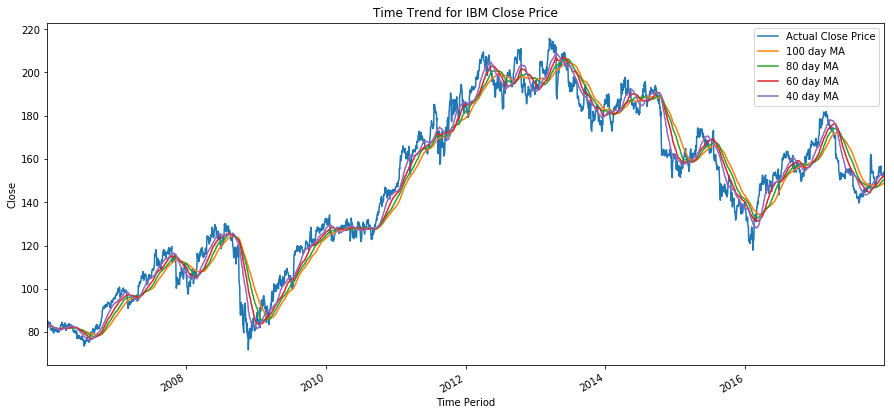

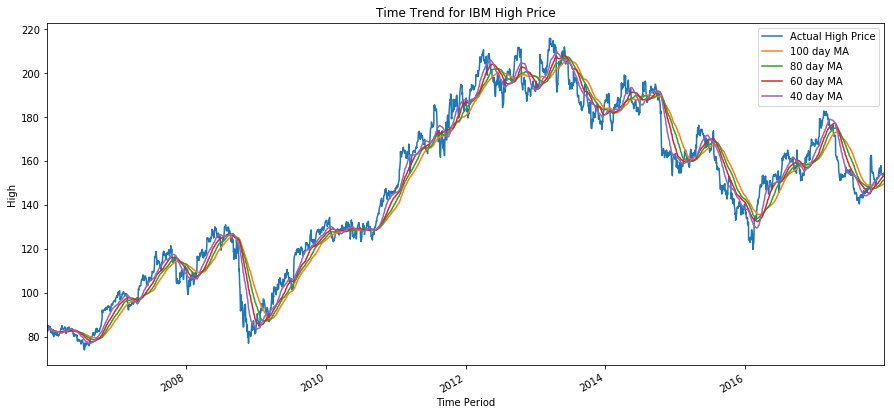

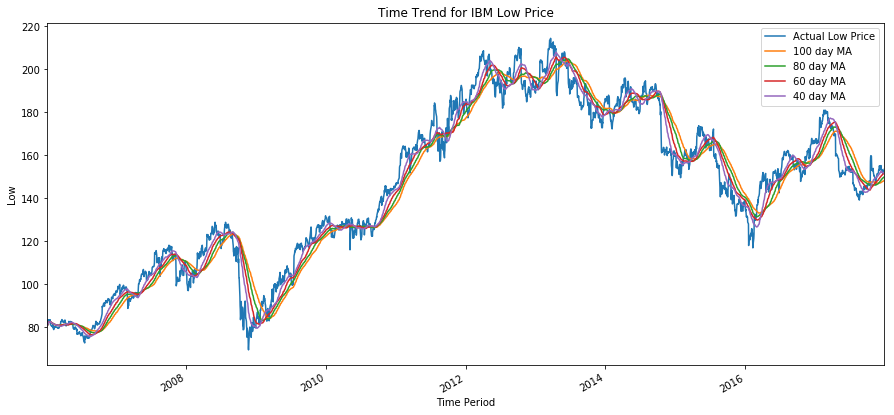

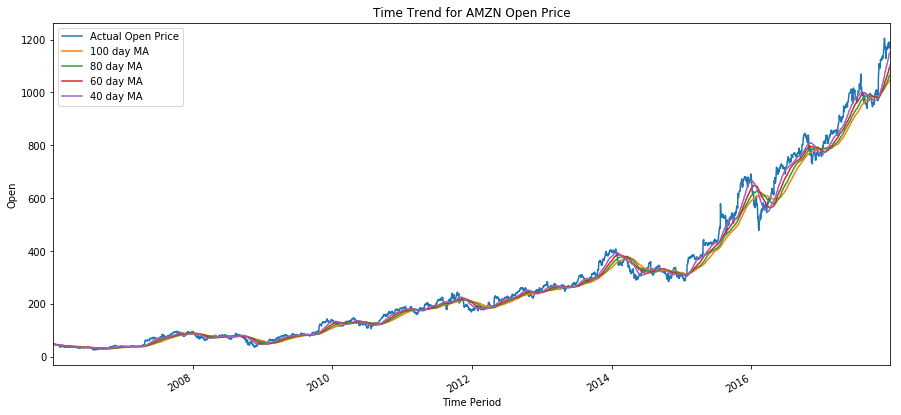

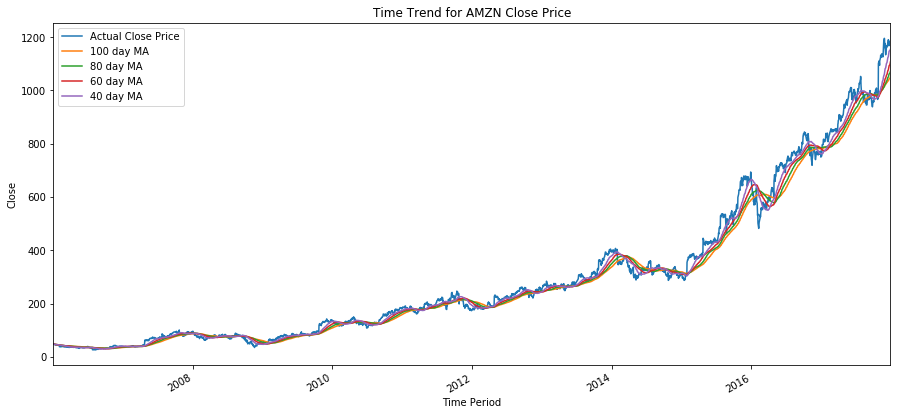

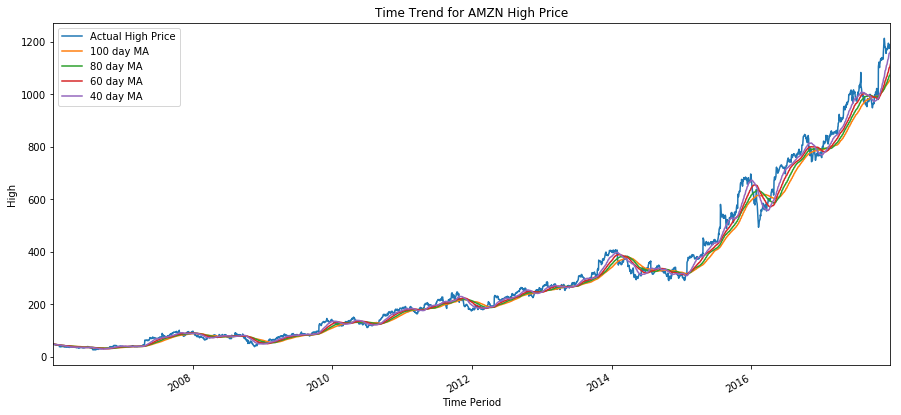

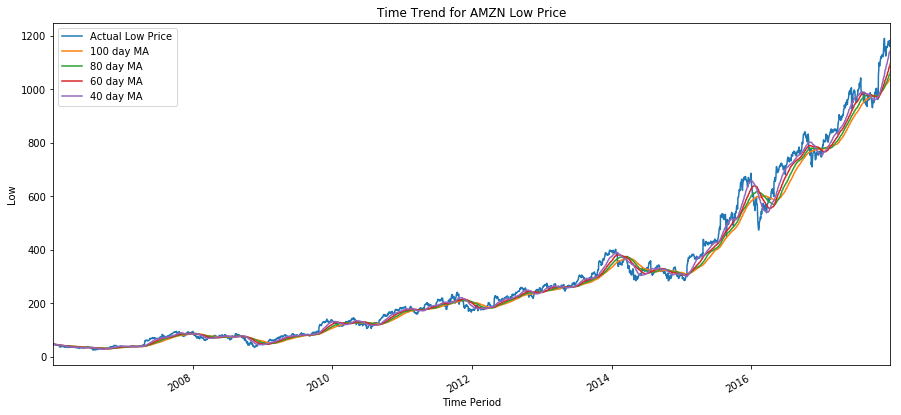

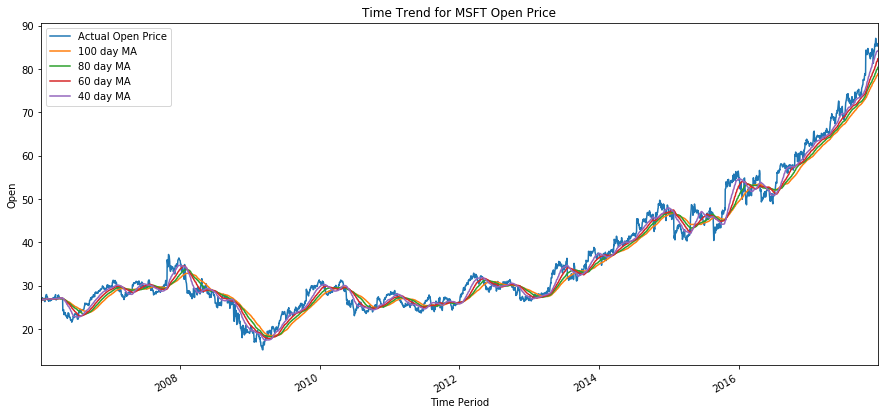

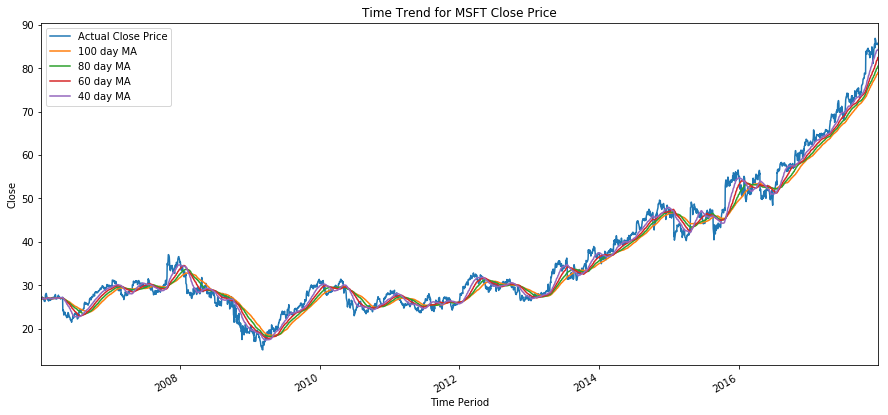

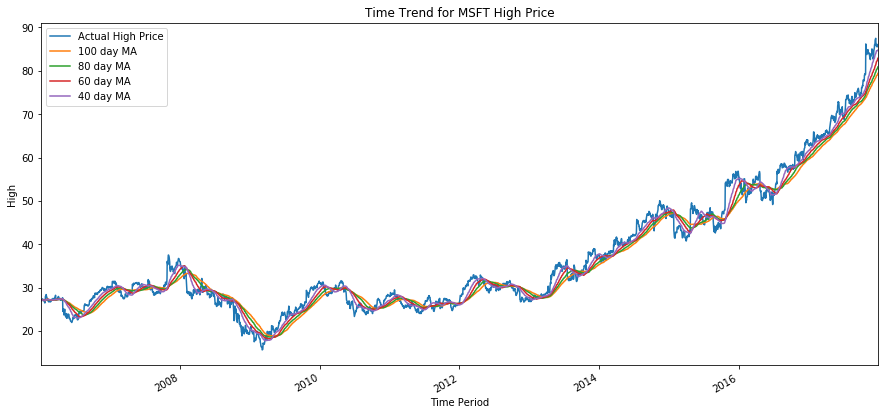

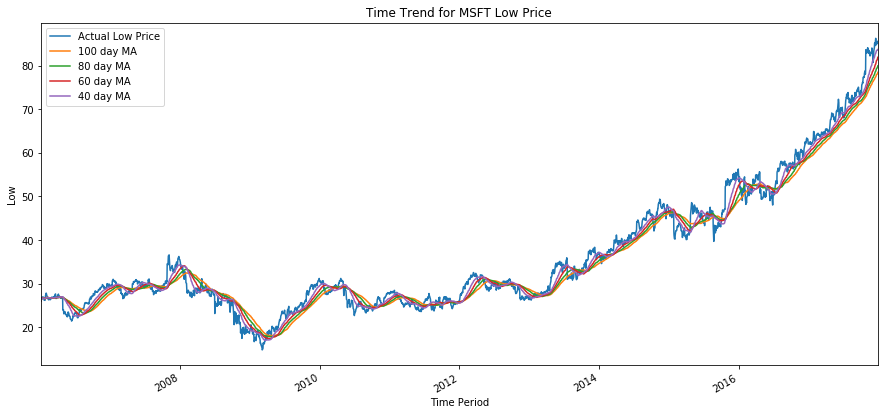

In [352]:
interested_variables = ['Open', 'Close', 'High', 'Low']

for i in focus_5:
    
    new_dataset = eda_dataset[eda_dataset['Name'] == i]
    
    for variable in interested_variables:
        
        plt.figure(figsize=(15,7))
    
        new_dataset[variable].plot(label = 'Actual ' + variable + ' Price')
        new_dataset[variable].rolling(window=100, min_periods=0).mean().plot(label = '100 day MA')
        new_dataset[variable].rolling(window=80, min_periods=0).mean().plot(label = '80 day MA')
        new_dataset[variable].rolling(window=60, min_periods=0).mean().plot(label = '60 day MA')
        new_dataset[variable].rolling(window=40, min_periods=0).mean().plot(label = '40 day MA')

        plt.xlabel('Time Period')
        plt.ylabel(variable)
        plt.title('Time Trend for '+i+  ' ' +variable+ ' Price')
        plt.legend()
        plt.show()

#### For different time periods

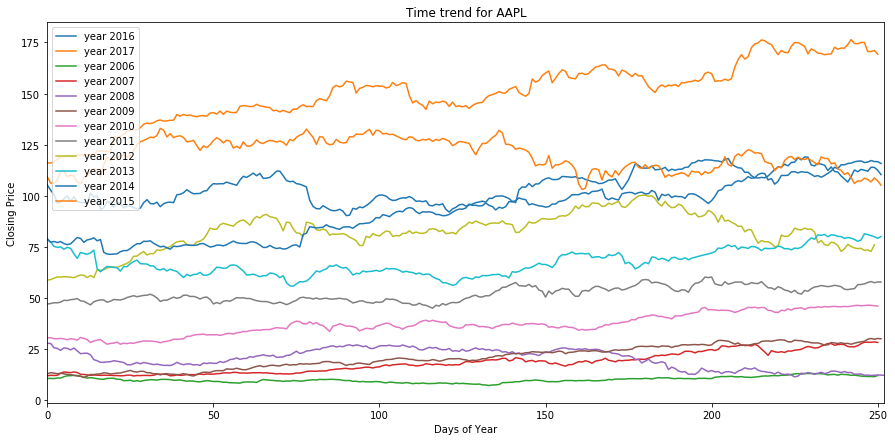

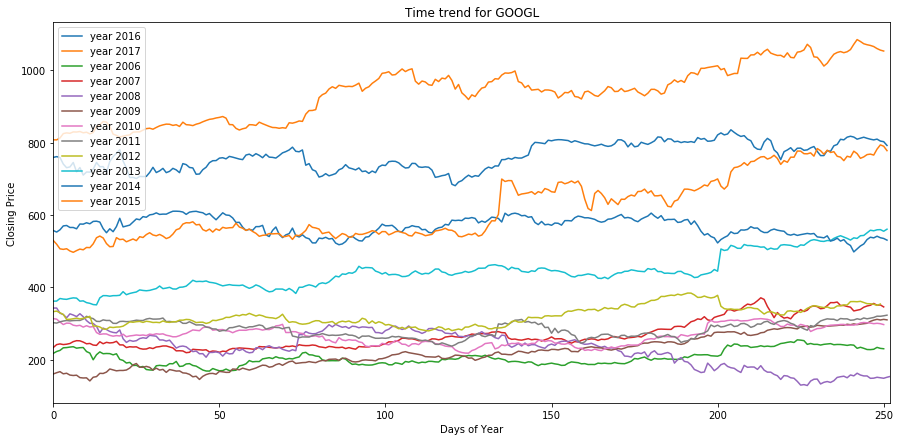

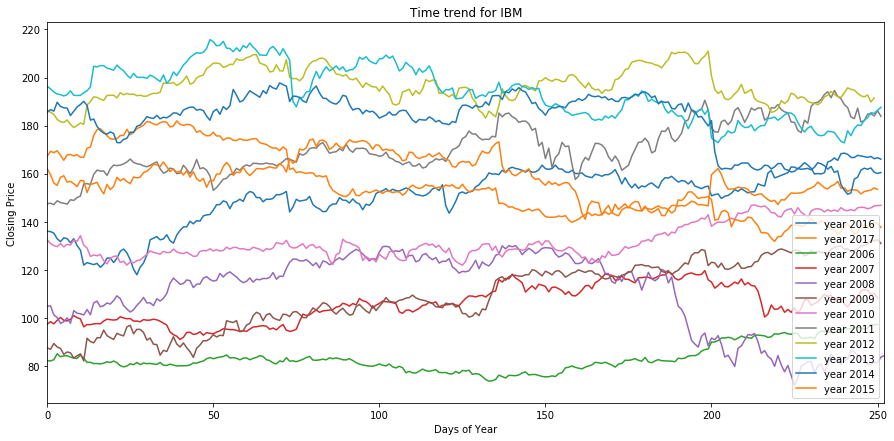

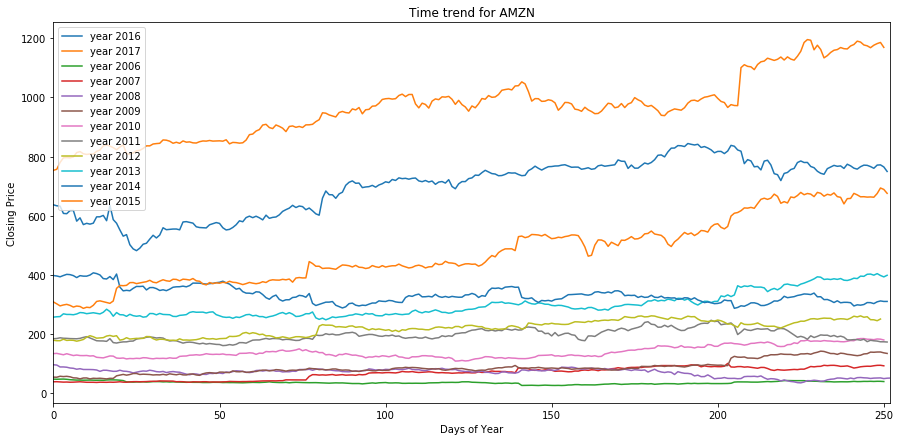

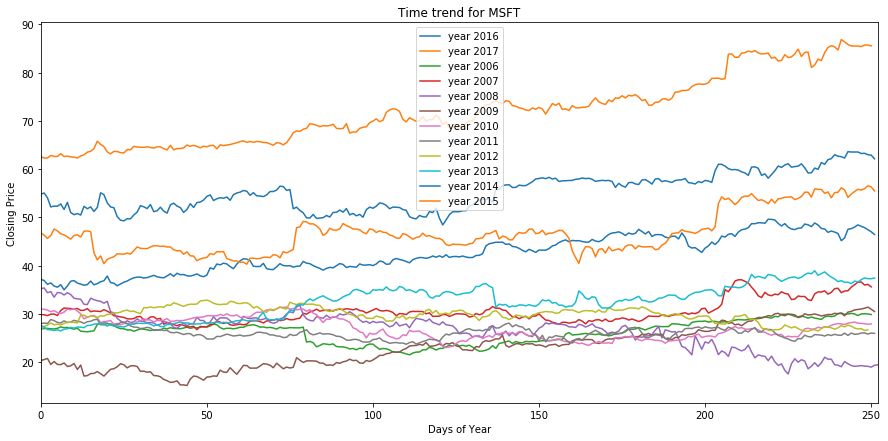

In [387]:
for i in focus_5:
    
    new_dataset_period = eda_dataset[eda_dataset['Name'] == i].reset_index()
    
    new_dataset_period['Year'] = new_dataset_period['Date'].apply(lambda x: x.year)
    
    time_period = list(set(new_dataset_period['Year']))
    
    plt.figure(figsize=(15,7))
    for time in time_period:
        
        new_dataset_period[new_dataset_period['Year'] == time].reset_index()['Close'].plot(label='year '+str(time))
    
    plt.title('Time trend for '+i)
    plt.ylabel('Closing Price')
    plt.xlabel('Days of Year')
    plt.legend()
    plt.show()